In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cards-image-datasetclassification/53cards-53-(200 X 200)-100.00.h5
/kaggle/input/cards-image-datasetclassification/cards.csv
/kaggle/input/cards-image-datasetclassification/14card types-14-(200 X 200)-94.61.h5
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/5.jpg
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/1.jpg
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/4.jpg
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/3.jpg
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/2.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/5.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/1.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/4.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/3.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/2.jpg
/kaggle/input/cards-image-datas

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from PIL import Image
import numpy as np

In [4]:
df = pd.read_csv('/kaggle/input/cards-image-datasetclassification/cards.csv')
df.head()

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class index  8155 non-null   int64 
 1   filepaths    8155 non-null   object
 2   labels       8155 non-null   object
 3   card type    8155 non-null   object
 4   data set     8155 non-null   object
dtypes: int64(1), object(4)
memory usage: 318.7+ KB


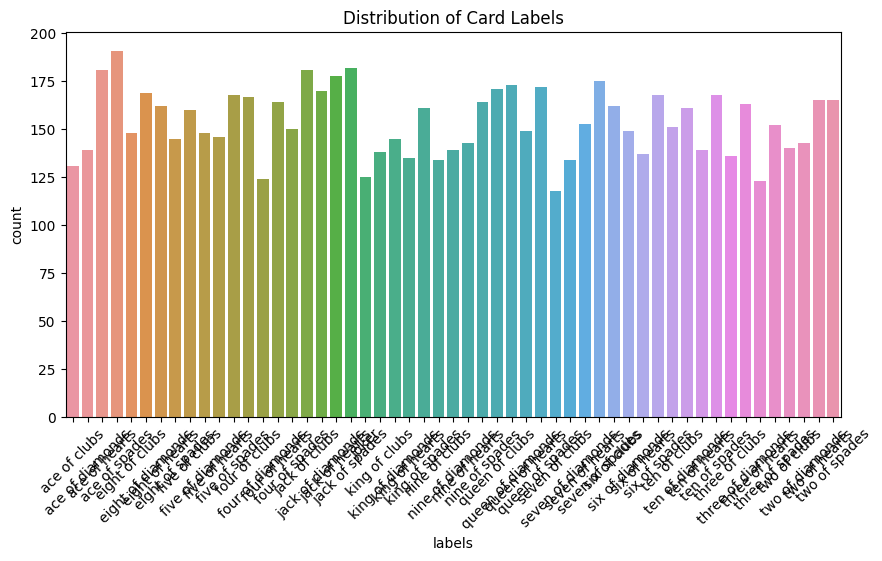

In [6]:
# Check the distribution of labels
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='labels')
plt.title("Distribution of Card Labels")
plt.xticks(rotation=45)
plt.show()

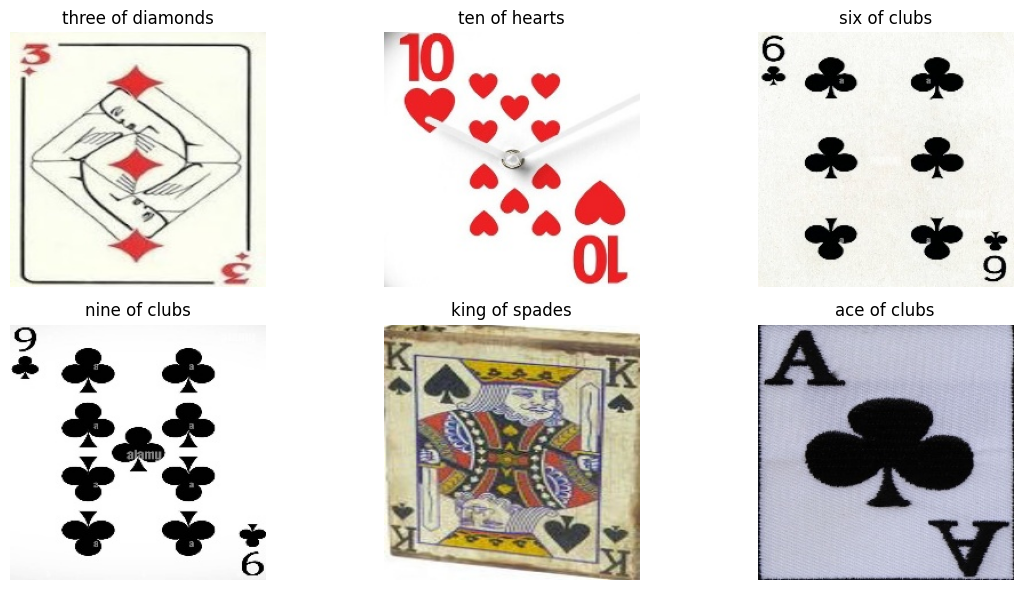

In [7]:
# Visualize some sample images from the dataset
plt.figure(figsize=(12,6))
sample_paths = df['filepaths'].sample(6, random_state=1).values

for i, path in enumerate(sample_paths):
    img_path = '/kaggle/input/cards-image-datasetclassification/' + path
    try:
        img = Image.open(img_path)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(df[df['filepaths'] == path]['labels'].values[0])
        plt.axis('off')
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

plt.tight_layout()
plt.show()

In [8]:
# Filter dataframe to include only valid image file paths
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
df = df[df['filepaths'].str.lower().str.endswith(valid_extensions)].reset_index(drop=True)

# Function to convert image to vector
def image_to_vector(path, size=(64, 64)):
    img_path = '/kaggle/input/cards-image-datasetclassification/' + path
    try:
        img = Image.open(img_path).convert('L')  # grayscale
        img = img.resize(size)
        return np.array(img).flatten()
    except Exception as e:
        print(f"Skipping {img_path} due to error: {e}")
        return None

In [9]:
# Convert all images to vectors (skip images that cannot be loaded)
X = []
valid_indices = []
for i, path in enumerate(tqdm(df['filepaths'])):
    vec = image_to_vector(path)
    if vec is not None:
        X.append(vec)
        valid_indices.append(i)

100%|██████████| 8154/8154 [01:10<00:00, 116.00it/s]


In [10]:
X = np.array(X)
y = df.loc[valid_indices, 'labels']

In [11]:
# Encode labels as numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [12]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [13]:
# Define 5 ML models to try
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [14]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Random Forest Accuracy: 0.4562
Logistic Regression Accuracy: 0.3017
Support Vector Machine Accuracy: 0.4249
K-Nearest Neighbors Accuracy: 0.3115
Decision Tree Accuracy: 0.2888


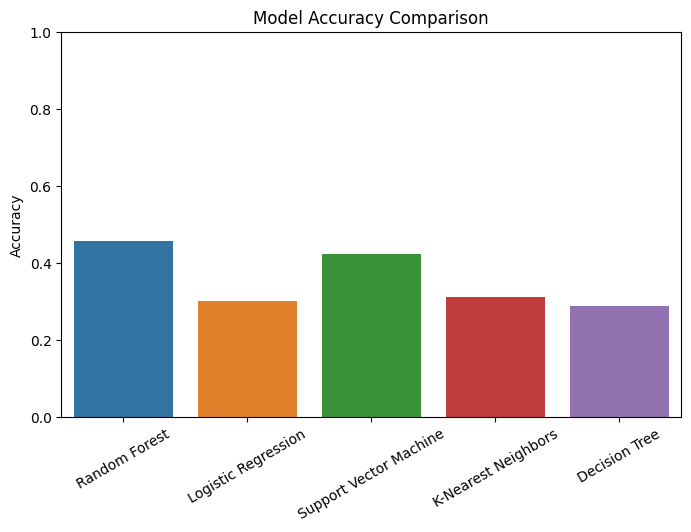

In [15]:
# Visualize model accuracies
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()